# Data Augmentation study

## Common Parameters

# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

In [4]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data_loader import *
import PIL

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

from Augmentor import Operations
from Augmentor.Operations import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

data_folder = "../data/isic2019/"
history_folder = 'history_proper'
pred_result_folder_test = 'test_predict_results_proper'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

models_info = read_models_info(history_folder, pred_result_folder_test)

training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Training_GroundTruth.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Analysis

Training data has 20264 samples.


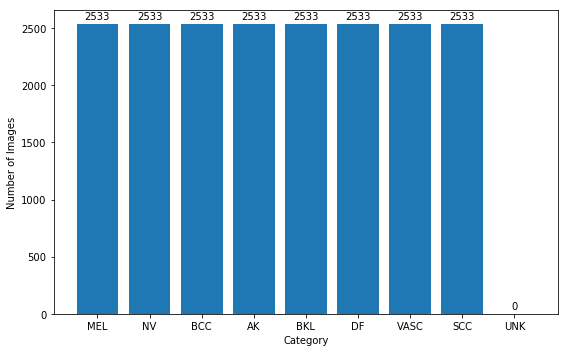

Test data has 5067 samples.


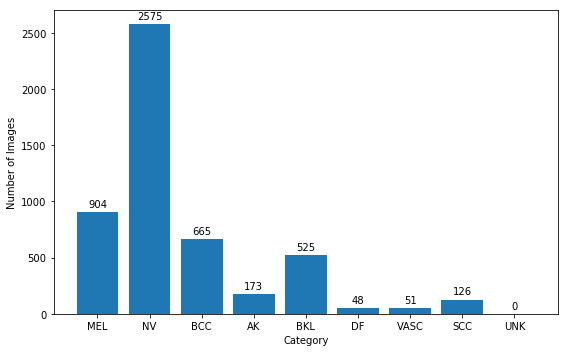

In [5]:
data_folder="../data/isic2019/sampled_balanced_20264_224_dg_0"

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder, test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

## Impact of the different data augmentation techniques on offline data augmentation

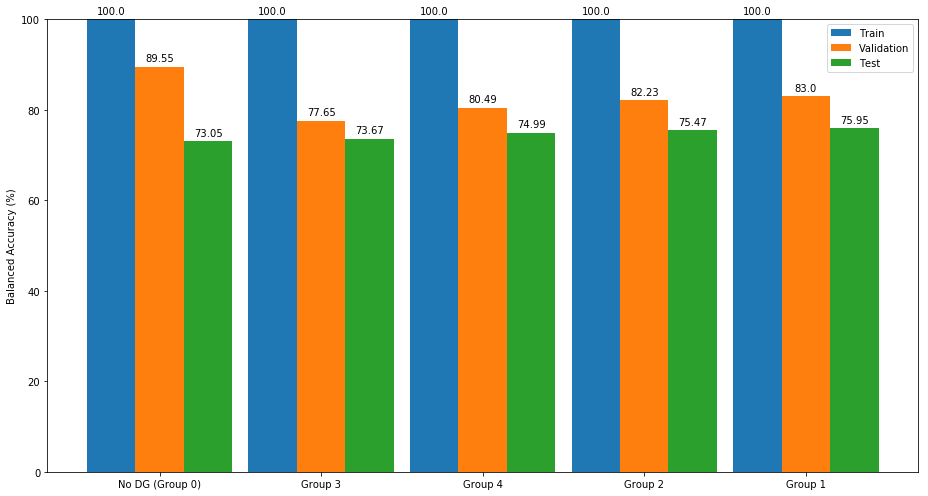

In [124]:
def xticklabelfunction(label):
    if label == "00":
        return "No DG (Group 0)"
    elif label == "10":
        return "Group 1"
    elif label == "20":
        return "Group 2"
    elif label == "30":
        return "Group 3"
    elif label == "40":
        return "Group 4"
    return "None"

fig = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16,
        "dggroup": ["00", "10", "20", "30", "40"]
    },
    figsize = (13,7),
    parameter="dggroup",
    xticklabelfunction=xticklabelfunction
)

fig.savefig(os.path.join("data_aug_group_bal_acc_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

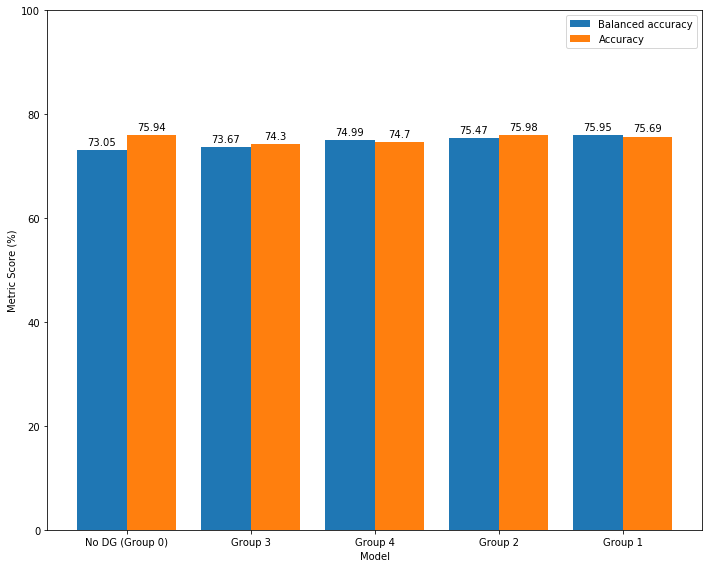

In [114]:
fig2 = plot_model_comparisson(
    models_info, 
    df_ground_truth,
    [balanced_accuracy_score, accuracy_score],
    ["Balanced accuracy", "Accuracy"],
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16
    },
    figsize = (10,8),
    parameter="dggroup",
    parameter_filter=["00", "10", "20", "30", "40"],
    xticklabelfunction=xticklabelfunction
)

fig2.savefig(os.path.join("data_aug_group_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

[{'model': 'DenseNet121', 'hyperparameters': {'balanced': '0', 'samples': '20517', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '00'}, 'log': '../history_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_00/0/training.csv', 'pred_test_0': None, 'pred_test': '../test_predict_results_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_00'}, {'model': 'DenseNet121', 'hyperparameters': {'balanced': '0', 'samples': '20517', 'feepochs': '2', 'ftepochs': '100', 'felr': '0.001000', 'ftlr': '0.000100', 'lambda': 'None', 'dropout': 'None', 'batch': '32', 'dggroup': '01'}, 'log': '../history_proper/DenseNet121/balanced_0-samples_20517-feepochs_2-ftepochs_100-felr_0.001000-ftlr_0.000100-lambda_None-dropout_None-batch_32-dggroup_01/0/t

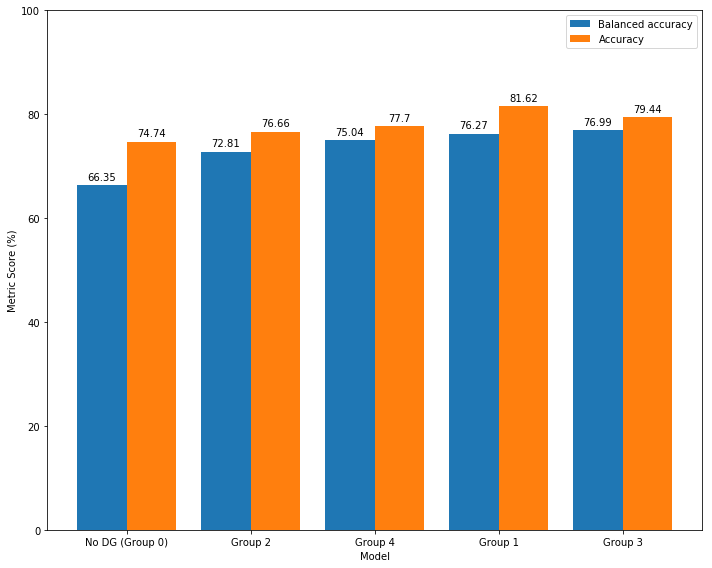

In [16]:
def xticklabelfunction(label):
    if label == "00":
        return "No DG (Group 0)"
    elif label == "01":
        return "Group 1"
    elif label == "02":
        return "Group 2"
    elif label == "03":
        return "Group 3"
    elif label == "04":
        return "Group 4"
    return "None"

fig2 = plot_model_comparisson(
    models_info, 
    df_ground_truth,
    [balanced_accuracy_score, accuracy_score],
    ["Balanced accuracy", "Accuracy"],
    constant_parameters= {
        "samples": "20517",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 32,
        "dggroup": ["00", "01", "02", "03", "04"]
    },
    figsize = (10,8),
    parameter="dggroup",
    xticklabelfunction=xticklabelfunction
)

# fig2.savefig(os.path.join("data_aug_group_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

## Impact of the different data augmentation approaches

11
01
00
10


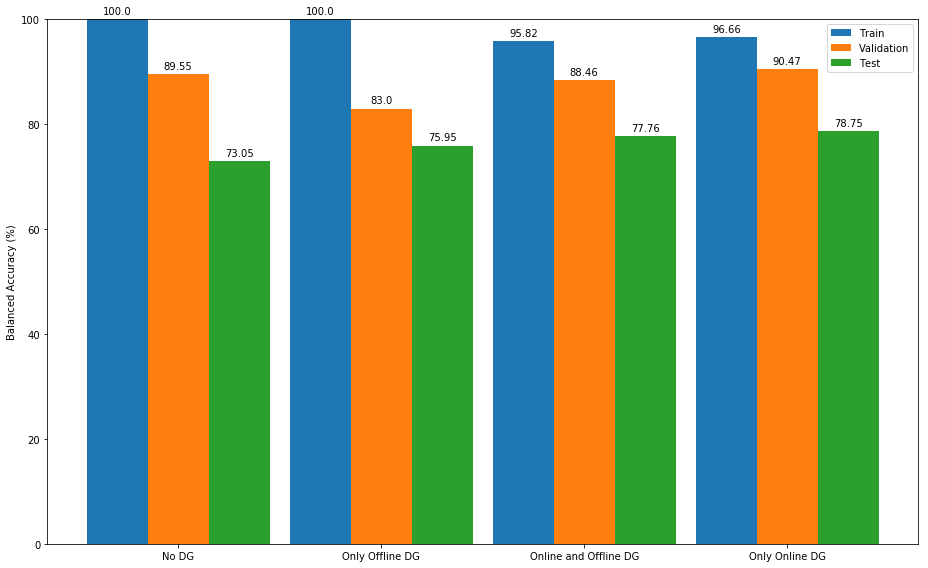

In [120]:
def xticklabelfunction(label):
    print(label)
    if label == "00":
        return "No DG"
    elif label == "01":
        return "Only Online DG"
    elif label == "10":
        return "Only Offline DG"
    elif label == "11":
        return "Online and Offline DG"
    return "None"
    
fig = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16,
        "dggroup": ["00", "01", "10", "11"]
    },
    figsize = (13,8),
    parameter="dggroup",
    xticklabelfunction=xticklabelfunction
)

fig.savefig(os.path.join("data_aug_mode_bal_acc_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)    

00
01
10
11


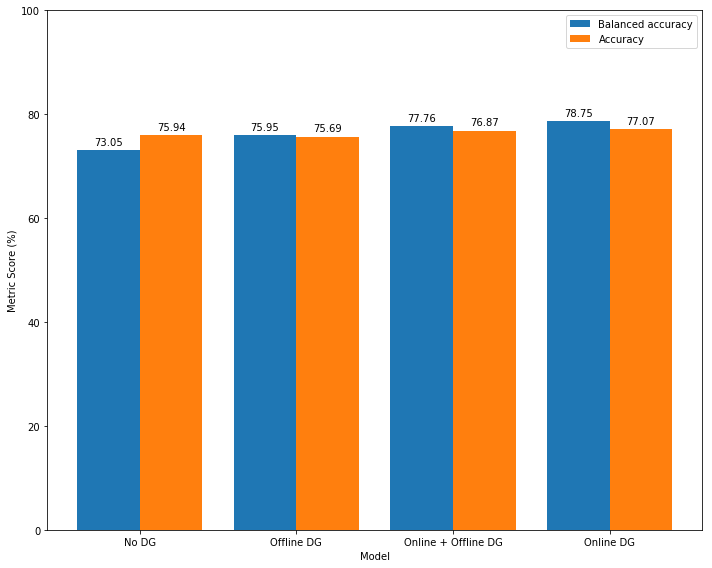

In [104]:
fig2 = plot_model_comparisson(
    models_info, 
    df_ground_truth,
    [balanced_accuracy_score, accuracy_score],
    ["Balanced accuracy", "Accuracy"],
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16
    },
    figsize = (10,8),
    parameter="dggroup",
    parameter_filter=["00", "01", "10", "11"],
    xticklabelfunction=xticklabelfunction
)

fig2.savefig(os.path.join("data_aug_mode_test_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

# Data Augmentation Methods:
* Random Rotations.
* Random Flips
* Random Shears
* Random Brightness variations
* Random Saturation variations

Original
Rotation by 90 degrees
Flip top/bottom
Flip left/right
Shear left
Shear right
Brighness reduction
Brighness increase
Color reduction
Color increase
Contrast decrease
Contrast increase
Tilt up/down
Tilt left/right
Skew by random corner 1
Skew by random corner 2
Distort sample
Erasing section
Random crop
Centered crop


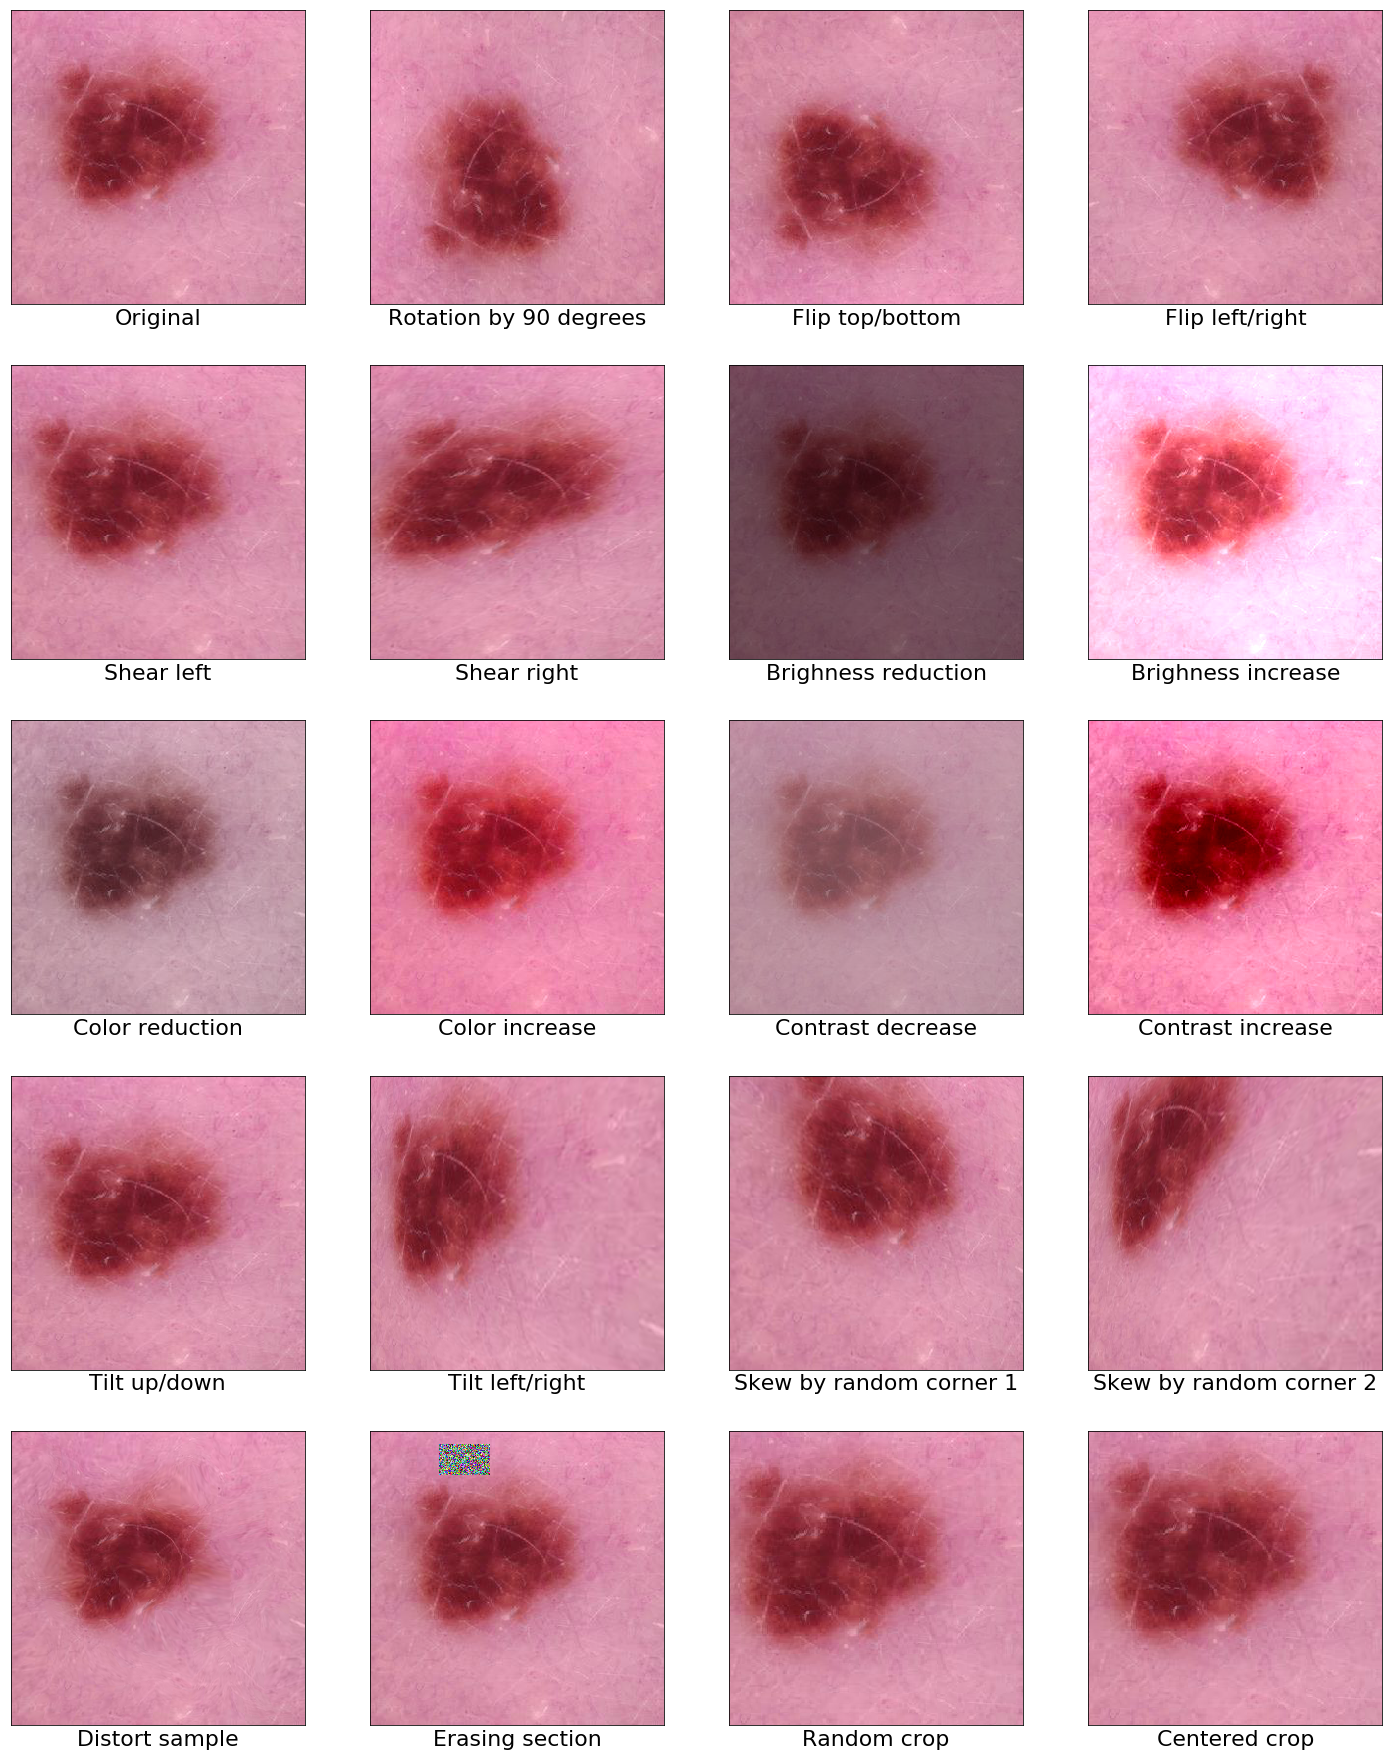

In [58]:
image_path = data_folder="../data/isic2019/sampled_balanced_20264_300/ISIC_2019_Training_Input/ISIC_0024444.jpg"

class OriginalImage(Operation):
    def __init__(self):
        Operation.__init__(self, 1)
    def perform_operation(self, images):
        return images

operations = {
    # Original image
    "Original": OriginalImage(),
    # Rotate the image by 90 degrees randomly
    "Rotation by 90 degrees": Operations.Rotate(probability=1, rotation=-1),
    # Flip top/bottom
    "Flip top/bottom":  Operations.Flip(probability=1, top_bottom_left_right="TOP_BOTTOM"),
    # Flip left/right
    "Flip left/right":  Operations.Flip(probability=1, top_bottom_left_right="LEFT_RIGHT"),
    # Shear Image
    "Shear left":  Operations.Shear(probability=1, max_shear_left=20, max_shear_right=0),
    # Shear Image
    "Shear right":  Operations.Shear(probability=1, max_shear_left=0, max_shear_right=20),
    # Random change brightness of the image
    "Brighness reduction": Operations.RandomBrightness(probability=0.5, min_factor=0.5,max_factor=0.6),
    # Random change brightness of the image
    "Brighness increase": Operations.RandomBrightness(probability=0.5, min_factor=1.4,max_factor=1.5),
    # Random change saturation of the image
    "Color reduction": Operations.RandomColor(probability=1, min_factor=0.5,max_factor=0.6),
    # Random change saturation of the image
    "Color increase": Operations.RandomColor(probability=1, min_factor=1.4,max_factor=1.5),
    # Random change saturation of the image
    "Contrast decrease": Operations.RandomContrast(probability=1, min_factor=0.5, max_factor=0.6),
    # Random change saturation of the image
    "Contrast increase": Operations.RandomContrast(probability=1, min_factor=1.5, max_factor=1.6),
    # Random Tilt up down
    "Tilt up/down": Operations.Skew(probability=1, skew_type="TILT_TOP_BOTTOM", magnitude=1.0),
    # Random Tilt left right
    "Tilt left/right": Operations.Skew(probability=1, skew_type="TILT_LEFT_RIGHT", magnitude=1.0),
    # Random Skew CORNER
    "Skew by random corner 1": Operations.Skew(probability=1, skew_type="CORNER", magnitude=1.3),
    # Random Skew CORNER
    "Skew by random corner 2": Operations.Skew(probability=1, skew_type="CORNER", magnitude=1.3),
    # Random distortions
    "Distort sample":  Operations.Distort(probability=1, grid_width=8, grid_height=8, magnitude=15),
    # Random erasing
    "Erasing section":  Operations.RandomErasing(probability=1, rectangle_area=0.25),
    # Random crops 
    "Random crop": Operations.CropPercentage(probability=1, percentage_area=0.80, centre=False, randomise_percentage_area=False),
    # Uncentered crop
    "Centered crop": Operations.CropPercentage(probability=1, percentage_area=0.80, centre=True, randomise_percentage_area=False),
}
    
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.patch.set_facecolor('white')

i=0
for label, operation in operations.items():
    print(label)
    ax = axes[floor(i/4), i%4]
    image = PIL.Image.open(image_path).convert('RGB')
    ax.imshow(operation.perform_operation([image])[0])
    ax.set_xlabel(label)
    i+=1
    
fig.tight_layout()
fig.savefig('augmentations.pdf', format='pdf', dpi=200, pad_inches=2)